<a href="https://colab.research.google.com/github/nathanjzhao/Wheat-Head-Object-Detection/blob/main/Wheat_Head_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import shutil
import os
import cv2
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

PARTS = 1   

In [ ]:
train_data = []

with open('/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/train.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  line_count = 0
  for row in csv_reader:
    if line_count == 0:
        column_names = row
    else:
      add = dict()

      for i in range(len(row)):
        add[column_names[i]] = row[i]

      train_data.append(add)

    line_count += 1
  print(f'Processed {line_count} lines.')

# Example data
print(train_data[0])

Processed 147794 lines.
{'image_id': 'b6ab77fd7', 'width': '1024', 'height': '1024', 'bbox': '[834.0, 222.0, 56.0, 36.0]', 'source': 'usask_1'}


In [ ]:
train_image_names = []

with open('/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/image_ids.txt', 'r') as f:
  for line in f:
    train_image_names.append(line.strip())


In [ ]:
train_ids, val_ids = train_test_split(train_image_names, test_size=0.03, random_state=99)

train_parts = dict()
val_parts = dict()

ct = 0
for id in train_ids:
  train_parts[id] = (ct % PARTS) + 1
  ct += 1

ct = 0
for id in val_ids:
  val_parts[id] = (ct % PARTS) + 1
  ct += 1

train_ids = train_parts
val_ids = val_parts


In [ ]:
folders_made_path = "/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/folders_made.txt"

if not os.path.isfile(folders_made_path):
  open(folders_made_path,"w")
    
  parent_dir = "/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data"

  for i in range(1, PARTS + 1):
    path_train_images = os.path.join(parent_dir, f'fold{i}/images{i}/train')
    path_val_images = os.path.join(parent_dir, f'fold{i}/images{i}/val')
    path_train_labels = os.path.join(parent_dir, f'fold{i}/labels{i}/train')
    path_val_labels = os.path.join(parent_dir, f'fold{i}/labels{i}/val')

    try:
      os.makedirs(path_train_images)
      os.makedirs(path_val_images)
      os.makedirs(path_train_labels)
      os.makedirs(path_val_labels)
    except OSError as error:
      print(f"Error: {error}")



In [ ]:
# for testing purposes
def revert():

  for i in range(1, PARTS + 1):
    train_path = f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{i}/images{i}/train"
    val_path = f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{i}/images{i}/val"
    
    train_files = os.listdir(train_path)
    val_files = os.listdir(val_path)

    for tfile in train_files:
      shutil.move(train_path + "/" + tfile,"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/train")

    for vfile in val_files:
      shutil.move(val_path + "/" + vfile,"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/train")

# revert()
print(len(os.listdir("/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/train")))

0


In [ ]:
original_dir = "/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/train"
images_moved_path = "/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/images_moved.txt"

if not os.path.isfile(images_moved_path):
  open(images_moved_path,"w")

  for idt in train_ids:
    num = train_ids[idt]
    shutil.move(f"{original_dir}/{idt}.jpg", f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{num}/images{num}/train")
  
  for idv in val_ids:
    num = val_ids[idv]
    shutil.move(f"{original_dir}/{idv}.jpg", f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{num}/images{num}/val")

In [ ]:
def write_info(row, path):
    with open(path,'a') as f:
      temp = row['bbox']
      
      bbox = temp.strip('[]').split(', ')
      #bbox data format is minx, miny, width, height
      minx = float(bbox[0])
      miny = float(bbox[1])
      width = float(bbox[2])
      height = float(bbox[3])

      #darknet format is center_x, center_y, percent_width_of_image, percent_height_of_image
      center_x = minx + (width/2)
      center_y = miny + (height/2)

      center_x /= 1024.0
      center_y /= 1024.0
      width /= 1024.0
      height /= 1024.0

      f.write("{0} {1} {2} {3} {4}\n".format(0, center_x, center_y, width, height))

In [ ]:
labels_created_path = "/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/labels_created.txt"

if not os.path.isfile(labels_created_path):
  open(labels_created_path,"w")

  for row in train_data:

    if row['image_id'] in train_ids:
      num = train_ids[row['image_id']]
      path = f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{num}/labels{num}/train/{row['image_id']}.txt"
    else:
      num = val_ids[row['image_id']]
      path = f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{num}/labels{num}/val/{row['image_id']}.txt"

    write_info(row, path)

/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold1/images1/train/02b6f199c.jpg
/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold1/images1/train/029e03e52.jpg
/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold1/images1/train/029c79463.jpg
/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold1/images1/train/09539e132.jpg
/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold1/images1/train/2e867b62b.jpg
/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold1/images1/train/01f37f1d3.jpg


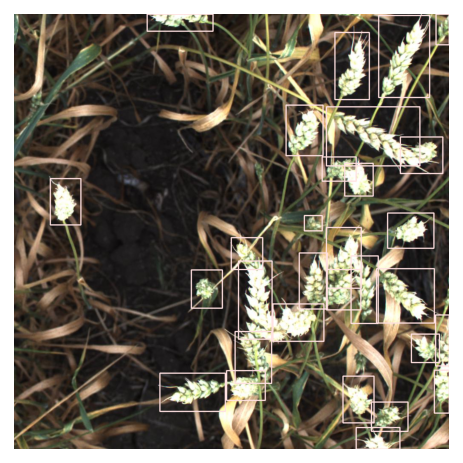

In [ ]:
def save_boxes(image_id, filesave_name):

  if image_id in train_ids:
    data_type = 'train'
  else:
    data_type = 'val'

  num = globals()[f'{data_type}_ids'][image_id]

  image_path = f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{num}/images{num}/{data_type}/{image_id}.jpg"
  print(image_path)
  if not os.path.isfile(image_path):
    print("Path does not exist")
    return

  img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

  with open(f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{num}/labels{num}/{data_type}/{image_id}.txt") as f:
    for line in f:
      content = line.split(" ")

      center_x = float(content[1]) * 1024
      center_y = float(content[2]) * 1024
      width = float(content[3]) * 1024
      height = float(content[4]) * 1024


      cv2.rectangle(img, (int(center_x - width/2), int(center_y - height/2)), (int(center_x + width/2), int(center_y + height/2)), (255,225,225), 2)

  no_miscolor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2.imwrite(f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/labeled/{filesave_name}.jpg", no_miscolor)
  plt.axis('off')
  plt.imshow(img)

#save_boxes(train_image_names[0],"example")
save_boxes(train_image_names[0],"labeled1")
save_boxes(train_image_names[1],"labeled2")
save_boxes(train_image_names[2],"labeled3")
save_boxes(train_image_names[100],"labeled4")
save_boxes(train_image_names[600],"labeled5")
save_boxes(train_image_names[8],"labeled6")

In [ ]:
yaml_path = "/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/yaml files"

for i in range(1, PARTS + 1):

  path = os.path.join(yaml_path, f"data{i}.yaml")
  with open(path, 'w') as f:

    train_path = f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{i}/images{i}/train"
    val_path = f"/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/fold{i}/images{i}/val"

    f.write(f"""
    train: {train_path}  # {len(os.listdir(train_path))} images
    val: {val_path}  # {len(os.listdir(val_path))} images

    nc: 1

    names: ['Wheathead']""")

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 2395 (delta 16), reused 13 (delta 6), pack-reused 2364
Receiving objects: 100% (2395/2395), 5.29 MiB | 7.13 MiB/s, done.
Resolving deltas: 100% (1574/1574), done.
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 4)) (0.29.21)
     |████████████████████████████████| 11.6MB 5.9MB/s 
     |████████████████████████████████| 14.5MB 236kB/s 
     |████████████████████████████████| 49.4MB 59kB/s 
     |████████████████████████████████| 2.2MB 47.3MB/s 
     |████████████████████████████████| 276kB 54.8MB/s 
     |████████████████████████████████| 25.9MB 118kB/s 
Requirement already up-to-date: tensorboard>=2.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 11)) (2.3.0)
Requirement already up-to-date: torch>=1.6.0 in /usr

/content/yolov5


In [ ]:
import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
!cat /proc/meminfo

os.environ['TCMALLOC_LARGE_ALLOC_REPORT_THRESHOLD'] = '11000000000'
torch.cuda.empty_cache()

torch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)
MemTotal:       13333552 kB
MemFree:         7844960 kB
MemAvailable:   12357384 kB
Buffers:          173140 kB
Cached:          4380848 kB
SwapCached:            0 kB
Active:           877804 kB
Inactive:        4161916 kB
Active(anon):     444708 kB
Inactive(anon):      364 kB
Active(file):     433096 kB
Inactive(file):  4161552 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              5292 kB
Writeback:             0 kB
AnonPages:        485708 kB
Mapped:           326664 kB
Shmem:               976 kB
Slab:             287232 kB
SReclaimable:     242980 kB
SUnreclaim:        44252 kB
KernelStack:        4784 kB
PageTables:         6804 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3108888 kB
VmallocTo

In [ ]:
#!python train.py --img-size 1024 --batch 9 --epochs 55 --data '/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/yaml files/data1.yaml' --cfg '/content/yolov5/models/yolov5l.yaml' --weights '/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/weights/weights1/best.pt' --device 0 

Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Namespace(adam=False, batch_size=32, bucket='', cache_images=False, cfg='/content/yolov5/models/yolov5s.yaml', data='/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/yaml files/data1.yaml', device='', epochs=300, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', img_size=[1024, 1024], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=32, weights='', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-08-21 23:50:42.036354: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'an

In [ ]:
!python detect.py --source '/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/test/' --weights '/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/weights/run3-x/best.pt' --conf 0.4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/test/', update=False, view_img=False, weights=['/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/weights/run3-x/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... 
Model Summary: 284 layers, 8.83906e+07 parameters, 8.45317e+07 gradients
image 1/10 /content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/test/2fd875eaa.jpg: 640x640 29 Wheatheads, Done. (0.077s)
image 2/10 /content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/test/348a992bb.jpg: 640x640 37 Wheatheads, Done. (0.055s)
image 3/10 /content/drive/My Drive/Colab Notebooks/Wheat Head Detection/data/test/51b3e36ab.jpg: 640x640 26 Wheatheads, Done. (0.055s)
image 4/10 /content/drive/My Drive/Colab Notebooks/Wheat

In [ ]:
from google.colab import files
def save():
  !zip -r /content/predictions3-x.zip /content/yolov5/inference/output

  files.download("/content/predictions3-x.zip")

save()

  adding: content/yolov5/inference/output/ (stored 0%)
  adding: content/yolov5/inference/output/cc3532ff6.jpg (deflated 2%)
  adding: content/yolov5/inference/output/796707dd7.jpg (deflated 2%)
  adding: content/yolov5/inference/output/cb8d261a3.jpg (deflated 2%)
  adding: content/yolov5/inference/output/2fd875eaa.jpg (deflated 2%)
  adding: content/yolov5/inference/output/51b3e36ab.jpg (deflated 2%)
  adding: content/yolov5/inference/output/348a992bb.jpg (deflated 2%)
  adding: content/yolov5/inference/output/aac893a91.jpg (deflated 3%)
  adding: content/yolov5/inference/output/51f1be19e.jpg (deflated 3%)
  adding: content/yolov5/inference/output/f5a1f0358.jpg (deflated 2%)
  adding: content/yolov5/inference/output/53f253011.jpg (deflated 2%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convert metrics to data usable by matplotlib 

with open('/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/results.txt','r') as f:
  lines = f.readlines()

  #  Epoch gpu_mem  GIoU  obj	cls  total targets img_size  P  R  mAP@.5  mAP@.5:.95 valGIoU valObj   valCls

  GIoUT = []
  Precision = []
  Recall = []
  F1Score = []
  F2Score = []
  mAP5 = []
  mAP595 = []
  GIoUV = []

  for line in lines:
    split = line.split()
    split[2] = float(split[2])
    split[8] = float(split[8])
    split[9] = float(split[9])
    split[10] = float(split[10])
    split[11] = float(split[11])
    split[12] = float(split[12])
    
    GIoUT.append(split[2])
    Precision.append(split[8])
    Recall.append(split[9])
    F1Score.append((2 * split[8] * split[9]) / (split[8] + split[9]))
    F2Score.append((5 * split[8] * split[9]) / ((4 * split[8]) + split[9]))
    mAP5.append(split[10])
    mAP595.append(split[11])
    GIoUV.append(split[12])

0.03403
0.7833
0.9371
0.8533253080678911
0.9016908213153824
0.9387
0.5383
0.03223


In [ ]:
# Show graphs for the model's metrics throughout training

path = '/content/drive/My Drive/Colab Notebooks/Wheat Head Detection/graphs/'

plt.title("Training GIoU Loss")
plt.plot(list(range(75)), GIoUT)
plt.savefig(path + "GIoUT")
plt.clf()

plt.title("Precision")
plt.plot(list(range(75)), Precision)
plt.savefig(path + "Precision")
plt.clf()

plt.title("Recall")
plt.plot(list(range(75)), Recall)
plt.axis([0,75,.5,.97])
plt.savefig(path + "Recall")
plt.clf()

plt.title("F1 Score")
plt.plot(list(range(75)), F1Score)
plt.savefig(path + "F1Score")
plt.clf()


plt.title("F2 Score")
plt.plot(list(range(75)), F2Score)
plt.savefig(path + "F2Score")
plt.clf()

plt.title("mAP@.5")
plt.plot(list(range(75)), mAP5)
plt.savefig(path + "mAP5")
plt.clf()

plt.title("mAP@[.5:.95]")
plt.plot(list(range(75)), mAP595)
plt.savefig(path + "mAP595")
plt.clf()

plt.title("Validation GIoU Loss")
plt.plot(list(range(75)), GIoUV)
plt.savefig(path + "GIoUV")
plt.clf()



<Figure size 432x288 with 0 Axes>